# Histogram Matching

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import numpy as np

def mse(img1, img2):
  h, w, channels = img1.shape
  diff = cv2.subtract(img1, img2)
  err = np.sum(diff**2)
  mse = err/(float(h*w))
  return mse

['/content/drive/MyDrive/original_images/zebras/zebra1.png', '/content/drive/MyDrive/transformed_images/zebra2horses/zebra2horse1.png']
No of Channel is: 3
No of Channel is: 3


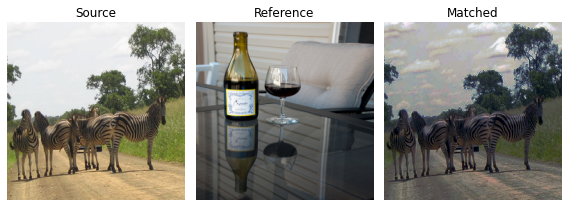

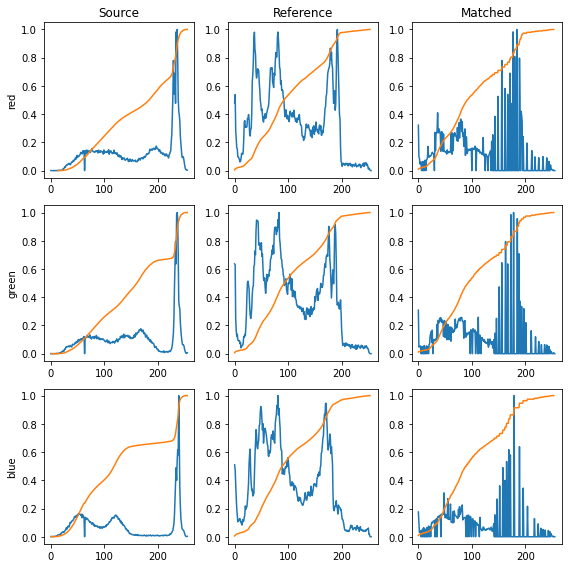

No of Channel is: 3
No of Channel is: 3


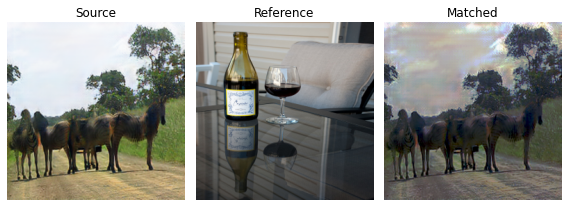

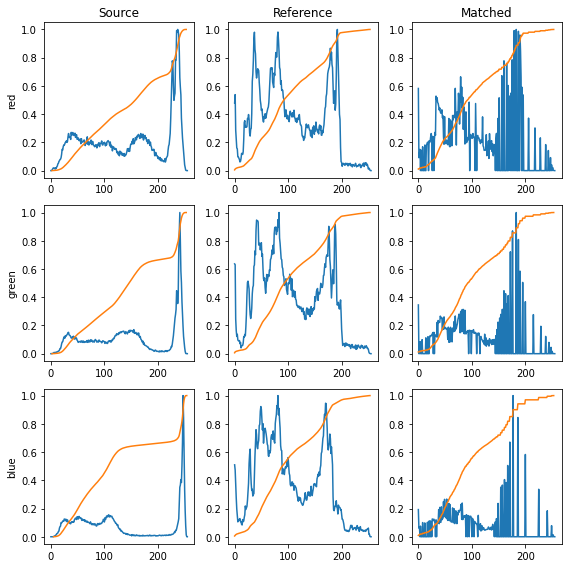

(256, 256, 3)
(256, 256, 3)
Image matching Error between the two images: 94.53379821777344


In [22]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cv2

import os 
to_process = []
# for root, dirs, files in os.walk('/drive/MyDrive/original_images/horses/horse1.png'):
#     for filename in files:
#         #print(os.path.join(root, filename), '\n')
#         file_name = os.path.join(root,filename)
#         to_process.append(file_name)

# to_process.sort()
to_process.append("/content/drive/MyDrive/original_images/zebras/zebra1.png")
to_process.append("/content/drive/MyDrive/transformed_images/zebra2horses/zebra2horse1.png")
print(to_process)

matched_orig = 0
matched_trans = 0

for i in range (0, len(to_process)):

    # reading main image
    img1 = cv2.imread(to_process[i], cv2.IMREAD_UNCHANGED)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

    # checking the number of channels
    print('No of Channel is: ' + str(img1.ndim))

    # reading reference image
    img2 = cv2.imread("/content/drive/MyDrive/original_images/photos/wine.jpg", cv2.IMREAD_UNCHANGED)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    dim = (256, 256)
    img2 = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)

    # checking the number of channels
    print('No of Channel is: ' + str(img2.ndim))

    image = img1
    reference = img2

    matched = match_histograms(image, reference, multichannel=True)
    if (i == 0): matched_orig = matched
    if (i == 1): matched_trans = matched

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                        sharex=True, sharey=True)

    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    ax1.imshow(img1)
    ax1.set_title('Source')
    ax2.imshow(reference)
    ax2.set_title('Reference')
    ax3.imshow(matched)
    ax3.set_title('Matched')

    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

    for i, img in enumerate((image, reference, matched)):
        for c, c_color in enumerate(('red', 'green', 'blue')):
            img_hist, bins = exposure.histogram(img[..., c], 
                                                source_range='dtype')
            axes[c, i].plot(bins, img_hist / img_hist.max())
            img_cdf, bins = exposure.cumulative_distribution(img[..., c])
            axes[c, i].plot(bins, img_cdf)
            axes[c, 0].set_ylabel(c_color)

    axes[0, 0].set_title('Source')
    axes[0, 1].set_title('Reference')
    axes[0, 2].set_title('Matched')

    plt.tight_layout()
    plt.show()


print(matched_orig.shape)
print(matched_trans.shape)

error = mse(matched_orig, matched_trans)

print("Image matching Error between the two images:", error)

['/content/drive/MyDrive/original_images/apples/apple2.png', '/content/drive/MyDrive/transformed_images/apple2oranges/apple2orange2.png']
No of Channel is: 3
No of Channel is: 3


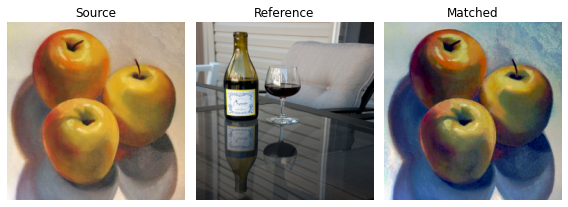

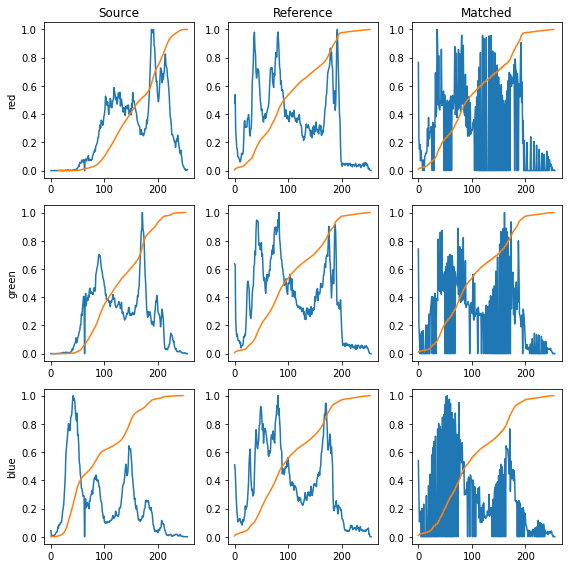

No of Channel is: 3
No of Channel is: 3


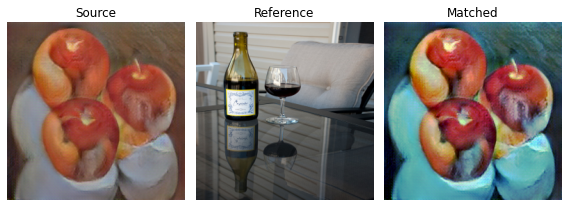

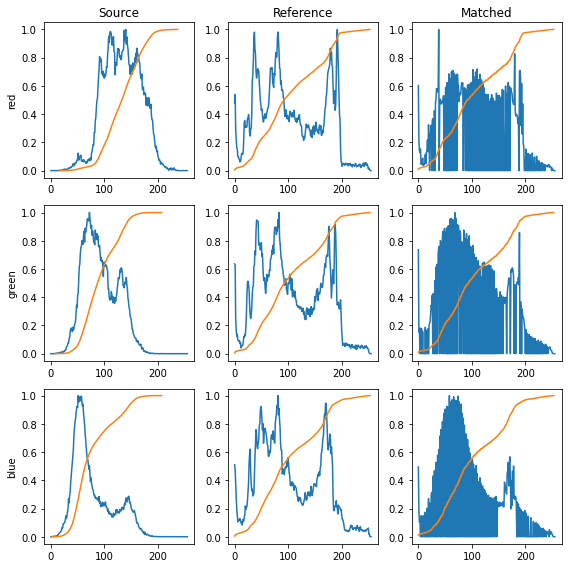

(256, 256, 3)
(256, 256, 3)
Image matching Error between the two images: 148.05364990234375


In [23]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cv2

import os 
to_process = []
# for root, dirs, files in os.walk('/drive/MyDrive/original_images/horses/horse1.png'):
#     for filename in files:
#         #print(os.path.join(root, filename), '\n')
#         file_name = os.path.join(root,filename)
#         to_process.append(file_name)

# to_process.sort()
to_process.append("/content/drive/MyDrive/original_images/apples/apple2.png")
to_process.append("/content/drive/MyDrive/transformed_images/apple2oranges/apple2orange2.png")
print(to_process)

matched_orig = 0
matched_trans = 0

for i in range (0, len(to_process)):

    # reading main image
    img1 = cv2.imread(to_process[i], cv2.IMREAD_UNCHANGED)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

    # checking the number of channels
    print('No of Channel is: ' + str(img1.ndim))

    # reading reference image
    img2 = cv2.imread("/content/drive/MyDrive/original_images/photos/wine.jpg", cv2.IMREAD_UNCHANGED)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    dim = (256, 256)
    img2 = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)

    # checking the number of channels
    print('No of Channel is: ' + str(img2.ndim))

    image = img1
    reference = img2

    matched = match_histograms(image, reference, multichannel=True)
    if (i == 0): matched_orig = matched
    if (i == 1): matched_trans = matched

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                        sharex=True, sharey=True)

    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    ax1.imshow(img1)
    ax1.set_title('Source')
    ax2.imshow(reference)
    ax2.set_title('Reference')
    ax3.imshow(matched)
    ax3.set_title('Matched')

    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

    for i, img in enumerate((image, reference, matched)):
        for c, c_color in enumerate(('red', 'green', 'blue')):
            img_hist, bins = exposure.histogram(img[..., c], 
                                                source_range='dtype')
            axes[c, i].plot(bins, img_hist / img_hist.max())
            img_cdf, bins = exposure.cumulative_distribution(img[..., c])
            axes[c, i].plot(bins, img_cdf)
            axes[c, 0].set_ylabel(c_color)

    axes[0, 0].set_title('Source')
    axes[0, 1].set_title('Reference')
    axes[0, 2].set_title('Matched')

    plt.tight_layout()
    plt.show()


print(matched_orig.shape)
print(matched_trans.shape)

error = mse(matched_orig, matched_trans)

print("Image matching Error between the two images:", error)

['/content/drive/MyDrive/original_images/horses/horse4.jpg', '/content/drive/MyDrive/transformed_images/horse2zebras/horse2zebra4.jpg']
No of Channel is: 3
No of Channel is: 3


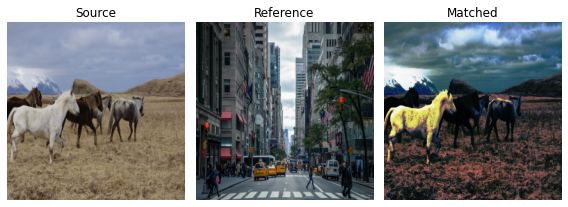

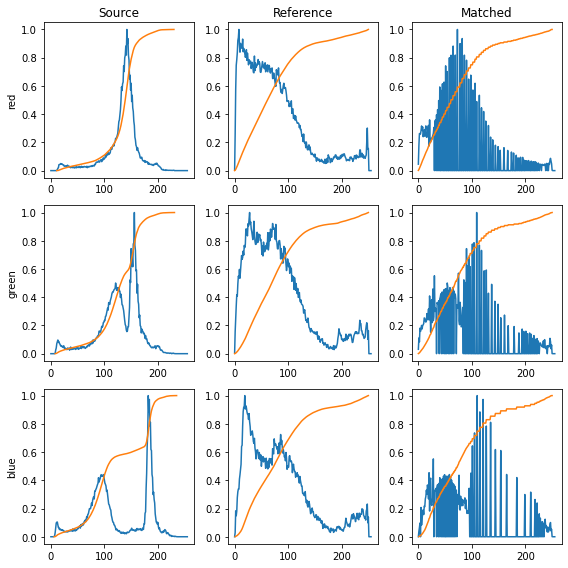

No of Channel is: 3
No of Channel is: 3


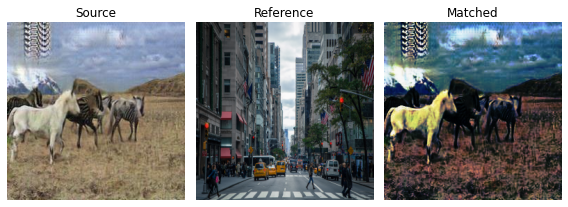

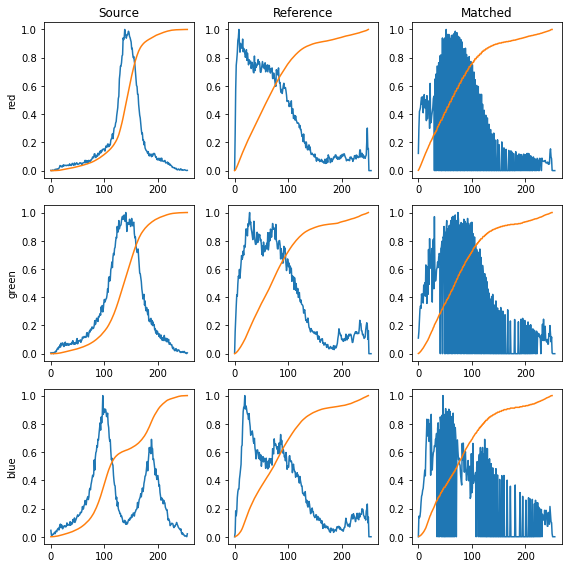

Image matching Error between the two images: 113.25602722167969


In [25]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cv2

import os 
to_process = []
# for root, dirs, files in os.walk('/drive/MyDrive/original_images/horses/horse1.png'):
#     for filename in files:
#         #print(os.path.join(root, filename), '\n')
#         file_name = os.path.join(root,filename)
#         to_process.append(file_name)

# to_process.sort()
to_process.append("/content/drive/MyDrive/original_images/horses/horse4.jpg")
to_process.append("/content/drive/MyDrive/transformed_images/horse2zebras/horse2zebra4.jpg")
print(to_process)

matched_orig = 0
matched_trans = 0

for i in range (0, len(to_process)):

    # reading main image
    img1 = cv2.imread(to_process[i], cv2.IMREAD_UNCHANGED)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    dim = (256, 256)
    img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)

    # checking the number of channels
    print('No of Channel is: ' + str(img1.ndim))

    # reading reference image
    img2 = cv2.imread("/content/drive/MyDrive/original_images/photos/city_scene.jpg", cv2.IMREAD_UNCHANGED)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    
    dim = (256, 256)
    img2 = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)

    # checking the number of channels
    print('No of Channel is: ' + str(img2.ndim))

    image = img1
    reference = img2

    matched = match_histograms(image, reference, multichannel=True)
    if (i == 0): matched_orig = matched
    if (i == 1): matched_trans = matched

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                        sharex=True, sharey=True)

    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    ax1.imshow(img1)
    ax1.set_title('Source')
    ax2.imshow(reference)
    ax2.set_title('Reference')
    ax3.imshow(matched)
    ax3.set_title('Matched')

    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

    for i, img in enumerate((image, reference, matched)):
        for c, c_color in enumerate(('red', 'green', 'blue')):
            img_hist, bins = exposure.histogram(img[..., c], 
                                                source_range='dtype')
            axes[c, i].plot(bins, img_hist / img_hist.max())
            img_cdf, bins = exposure.cumulative_distribution(img[..., c])
            axes[c, i].plot(bins, img_cdf)
            axes[c, 0].set_ylabel(c_color)

    axes[0, 0].set_title('Source')
    axes[0, 1].set_title('Reference')
    axes[0, 2].set_title('Matched')

    plt.tight_layout()
    plt.show()

error = mse(matched_orig, matched_trans)

print("Image matching Error between the two images:", error)

['/content/drive/MyDrive/original_images/horses/horse2.png', '/content/drive/MyDrive/transformed_images/horse2zebras/horse2zebra2.png']
No of Channel is: 3
No of Channel is: 3


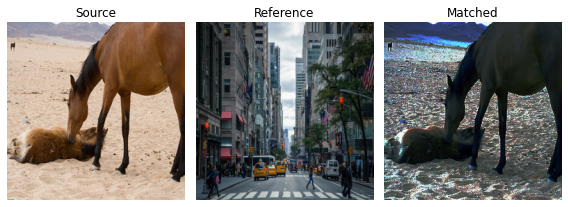

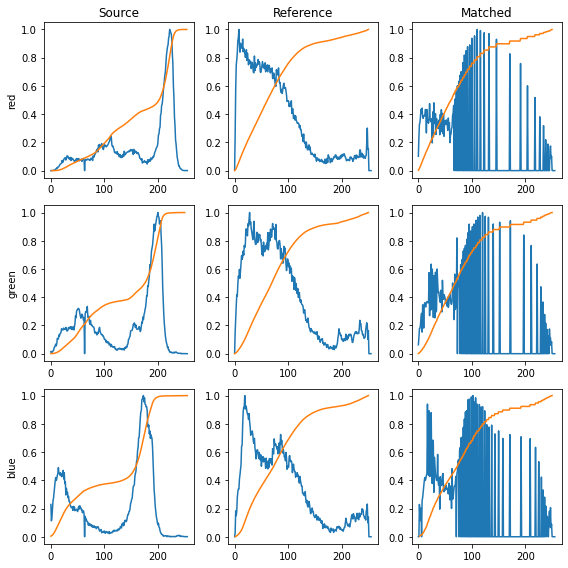

No of Channel is: 3
No of Channel is: 3


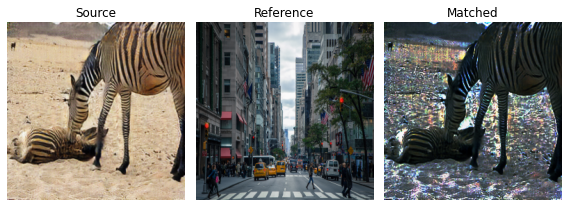

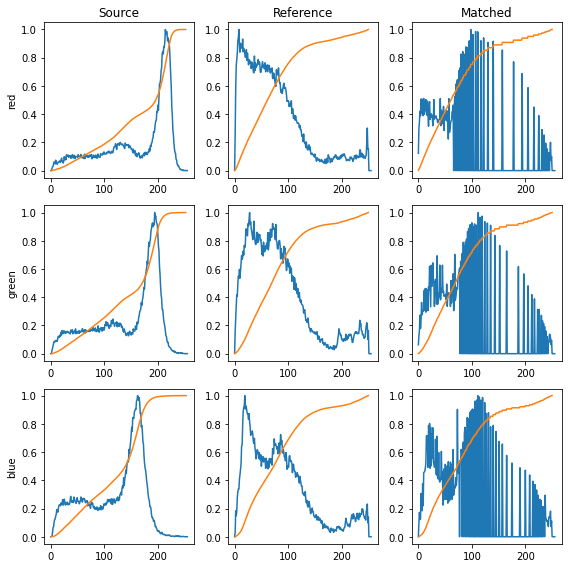

Image matching Error between the two images: 128.669189453125


In [26]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cv2

import os 
to_process = []
# for root, dirs, files in os.walk('/drive/MyDrive/original_images/horses/horse1.png'):
#     for filename in files:
#         #print(os.path.join(root, filename), '\n')
#         file_name = os.path.join(root,filename)
#         to_process.append(file_name)

# to_process.sort()
to_process.append("/content/drive/MyDrive/original_images/horses/horse2.png")
to_process.append("/content/drive/MyDrive/transformed_images/horse2zebras/horse2zebra2.png")
print(to_process)

matched_orig = 0
matched_trans = 0

for i in range (0, len(to_process)):

    # reading main image
    img1 = cv2.imread(to_process[i], cv2.IMREAD_UNCHANGED)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    dim = (256, 256)
    img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)

    # checking the number of channels
    print('No of Channel is: ' + str(img1.ndim))

    # reading reference image
    img2 = cv2.imread("/content/drive/MyDrive/original_images/photos/city_scene.jpg", cv2.IMREAD_UNCHANGED)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    
    dim = (256, 256)
    img2 = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)

    # checking the number of channels
    print('No of Channel is: ' + str(img2.ndim))

    image = img1
    reference = img2

    matched = match_histograms(image, reference, multichannel=True)
    if (i == 0): matched_orig = matched
    if (i == 1): matched_trans = matched

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                        sharex=True, sharey=True)

    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    ax1.imshow(img1)
    ax1.set_title('Source')
    ax2.imshow(reference)
    ax2.set_title('Reference')
    ax3.imshow(matched)
    ax3.set_title('Matched')

    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

    for i, img in enumerate((image, reference, matched)):
        for c, c_color in enumerate(('red', 'green', 'blue')):
            img_hist, bins = exposure.histogram(img[..., c], 
                                                source_range='dtype')
            axes[c, i].plot(bins, img_hist / img_hist.max())
            img_cdf, bins = exposure.cumulative_distribution(img[..., c])
            axes[c, i].plot(bins, img_cdf)
            axes[c, 0].set_ylabel(c_color)

    axes[0, 0].set_title('Source')
    axes[0, 1].set_title('Reference')
    axes[0, 2].set_title('Matched')

    plt.tight_layout()
    plt.show()

error = mse(matched_orig, matched_trans)

print("Image matching Error between the two images:", error)